In [2]:
import qiskit
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
from qiskit_aer import Aer, AerSimulator
import matplotlib
import pylatexenc

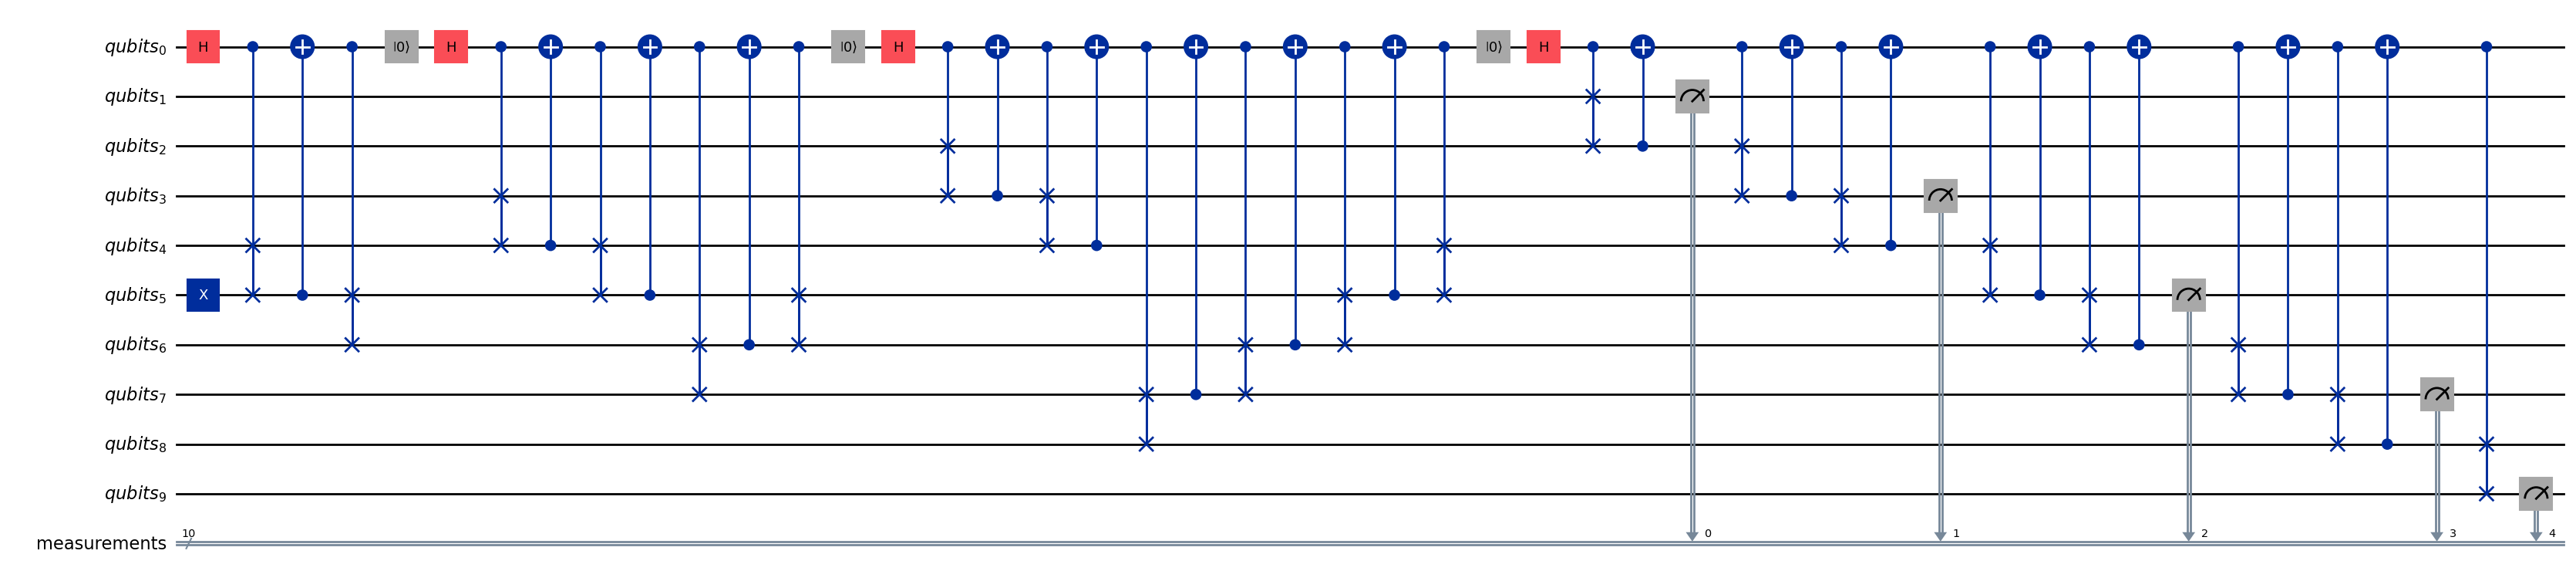

In [3]:
classical_reg = ClassicalRegister(10, name = 'measurements')
quantum_reg = QuantumRegister(10, name = 'qubits')
# Implementing by myself
qc = QuantumCircuit(quantum_reg,classical_reg)
qc.h(0)
qc.x(5)
qc.cswap(0,4,5)
qc.cx(5,0)
qc.cswap(0,5,6)
# reset
qc.reset(0)
# 2nd level
qc.h(0)
qc.cswap(0,3,4)
qc.cx(4,0)
qc.cswap(0,4,5)
qc.cx(5,0)
qc.cswap(0,6,7)
qc.cx(6,0)
qc.cswap(0,5,6)
# reset
qc.reset(0)
# 3rd level
qc.h(0)
qc.cswap(0,2,3)
qc.cx(3,0)
qc.cswap(0,3,4)
qc.cx(4,0)
qc.cswap(0,7,8)
qc.cx(7,0)
qc.cswap(0,6,7)
qc.cx(6,0)
qc.cswap(0,5,6)
qc.cx(5,0)
qc.cswap(0,4,5)
# reset 
qc.reset(0)
# 4th level
qc.h(0)
qc.cswap(0,1,2)
qc.cx(2,0)
qc.cswap(0,2,3)
qc.cx(3,0)
qc.cswap(0,3,4)
qc.cx(4,0)
qc.cswap(0,4,5)
qc.cx(5,0)
qc.cswap(0,5,6)
qc.cx(6,0)
qc.cswap(0,6,7)
qc.cx(7,0)
qc.cswap(0,7,8)
qc.cx(8,0)
qc.cswap(0,8,9)
qc.measure([1,3,5,7,9],range(5))    
qc.draw("mpl", fold = -1)           

In [4]:
backend = AerSimulator()
# make the quantum circuit compatible with backend
pass_manager = generate_preset_pass_manager(backend = backend, optimization_level=3)
transpiled_circuit = pass_manager.run(qc)

sampler = Sampler(mode = backend)
counts = sampler.run([qc], shots = 1024).result()[0].data.measurements.get_counts()
print(counts)

{'0000001000': 266, '0000000001': 63, '0000010000': 67, '0000000010': 249, '0000000100': 379}


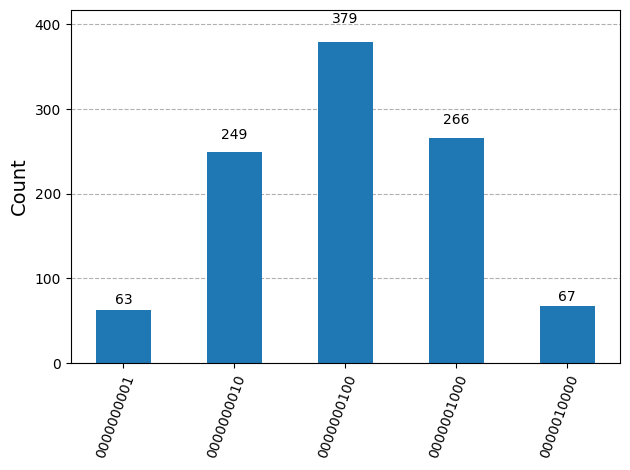

In [5]:
from qiskit.visualization import plot_distribution
plot_histogram(counts)

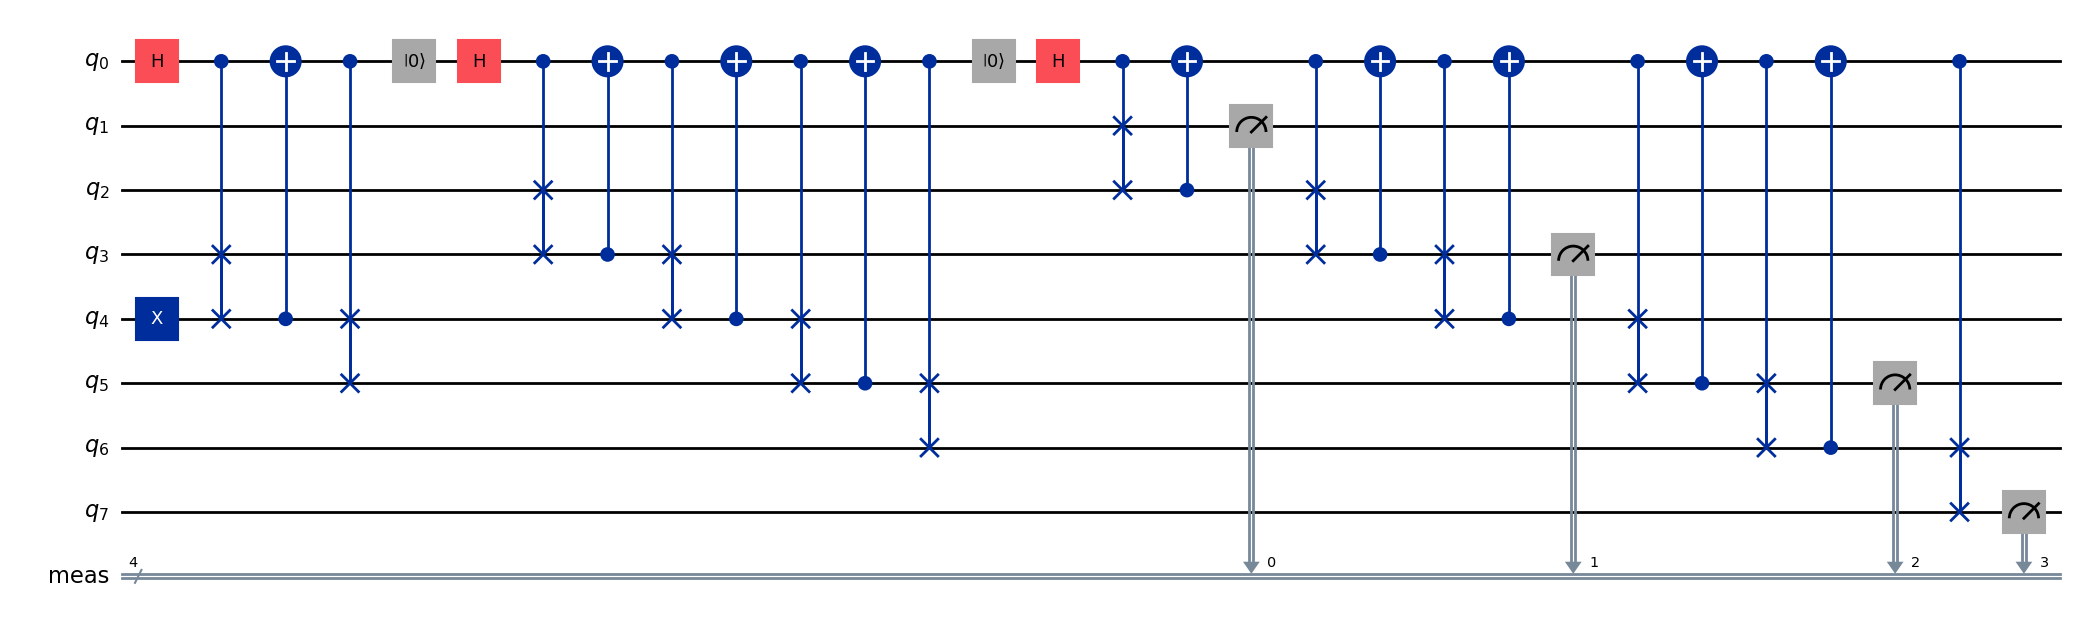

In [ ]:
# 3-levle Quantum Galton Board
quantum_register = QuantumRegister(8, name = 'q')
classical_register = ClassicalRegister(4, name = 'meas')
quantum_circuit = QuantumCircuit(quantum_register, classical_register)
quantum_circuit.h(0)
quantum_circuit.x(4)
quantum_circuit.cswap(0,3,4)
quantum_circuit.cx(4,0)
quantum_circuit.cswap(0,4,5)
#reset and put in superposition
quantum_circuit.reset(0)
quantum_circuit.h(0)
# possibe positions are q3,q5
# SWAPS around q3
quantum_circuit.cswap(0,2,3)
quantum_circuit.cx(3,0)
quantum_circuit.cswap(0,3,4)
# extra Control-Not
quantum_circuit.cx(4,0)
# SWAPS around q5
quantum_circuit.cswap(0,4,5)
quantum_circuit.cx(5,0)
quantum_circuit.cswap(0,5,6)
# Now, we have total 4 possibilities. Either the ball will be at 2,4 or 4,6
# lets say, first we consider the ball is at either 2 or 4
# reset and put in superposition
quantum_circuit.reset(0)
quantum_circuit.h(0)
# SWAPs around 2
quantum_circuit.cswap(0,1,2)
quantum_circuit.cx(2,0)
quantum_circuit.cswap(0,2,3)
# Extra Controlled-Not
quantum_circuit.cx(3,0)
# SWAPs around 4
quantum_circuit.cswap(0,3,4)
quantum_circuit.cx(4,0)
quantum_circuit.cswap(0,4,5)
#Extra Controlled-Not
quantum_circuit.cx(5,0)
# SWAPs around 6
quantum_circuit.cswap(0,5,6)
quantum_circuit.cx(6,0)
quantum_circuit.cswap(0,6,7)
quantum_circuit.measure([1,3,5,7], range(4))
quantum_circuit.draw('mpl', fold = -1)

{'0010': 377, '0100': 380, '1000': 144, '0001': 123}


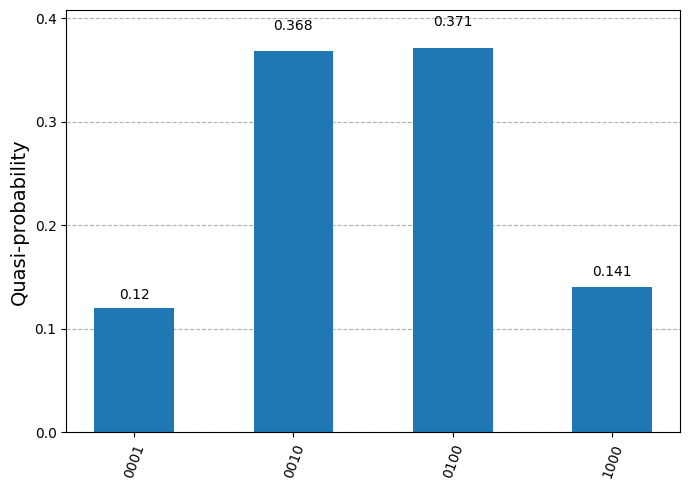

In [7]:
backend = AerSimulator()
# make the quantum circuit compatible with backend
pass_manager = generate_preset_pass_manager(backend = backend, optimization_level=3)
transpiled_circuit = pass_manager.run(quantum_circuit)

sampler = Sampler(mode = backend)
counts = sampler.run([quantum_circuit], shots = 1024).result()[0].data.meas.get_counts()
print(counts)
plot_distribution(counts)

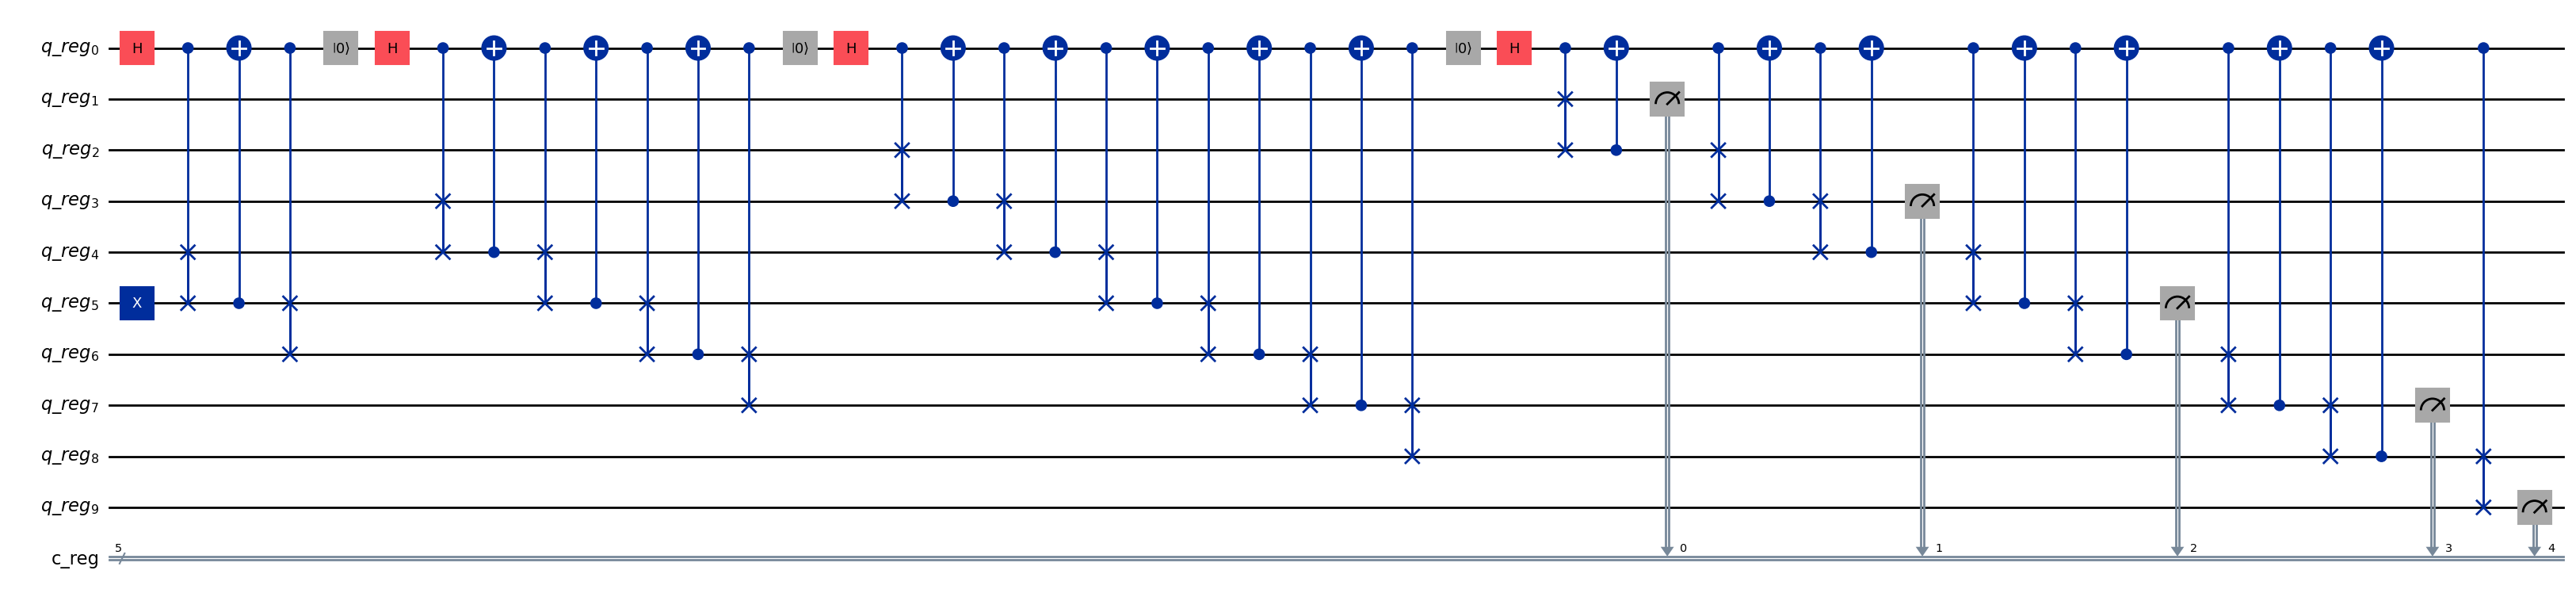

In [8]:
# With the same logic, lets now do for level 4
c_register = ClassicalRegister(5, name = "c_reg")
q_register = QuantumRegister(10, name = "q_reg")

quantum_circ = QuantumCircuit(q_register, c_register)
quantum_circ.h(0)
quantum_circ.x(5)
quantum_circ.cswap(0,4,5)
quantum_circ.cx(5,0)
quantum_circ.cswap(0,5,6)
# Reset and put into superposition
quantum_circ.reset(0)
quantum_circ.h(0)
# Now, we will find our ball at 4 and 6
# SWAPs around 4
quantum_circ.cswap(0,3,4)
quantum_circ.cx(4,0)
quantum_circ.cswap(0,4,5)
#Extra Controlled-Not
quantum_circ.cx(5,0)
# SWAPs around 6
quantum_circ.cswap(0,5,6)
quantum_circ.cx(6,0)
quantum_circ.cswap(0,6,7)
# Now, we'll find the ball at either 3,5 or 5,7 
# Reset and put in superposition
quantum_circ.reset(0)
quantum_circ.h(0)
# SWAPs around q3
quantum_circ.cswap(0,2,3)
quantum_circ.cx(3,0)
quantum_circ.cswap(0,3,4)
# Extra Controlled-No
quantum_circ.cx(4,0)
# SWAPs around q5
quantum_circ.cswap(0,4,5)
quantum_circ.cx(5,0)
quantum_circ.cswap(0,5,6)
# Extra Controlled-Not
quantum_circ.cx(6,0)
# SWAPs around q7
quantum_circ.cswap(0,6,7)
quantum_circ.cx(7,0)
quantum_circ.cswap(0,7,8)
# Reset and put in superposition
quantum_circ.reset(0)
quantum_circ.h(0)
# Now the ball will be at 2,4 or 4,6 or 6,8
#SWAPs around q2
quantum_circ.cswap(0,1,2)
quantum_circ.cx(2,0)
quantum_circ.cswap(0,2,3)
#Extra controlled-Not
quantum_circ.cx(3,0)
# SWAPs around q4
quantum_circ.cswap(0,3,4)
quantum_circ.cx(4,0)
quantum_circ.cswap(0,4,5)
#Extra Controlled-Not
quantum_circ.cx(5,0)
# SWAPs around q6
quantum_circ.cswap(0,5,6)  # -----
quantum_circ.cx(6,0)
quantum_circ.cswap(0,6,7)
# Extra Controlled-Not
quantum_circ.cx(7,0)
# SWAPs around q8
quantum_circ.cswap(0,7,8)
quantum_circ.cx(8,0)
quantum_circ.cswap(0,8,9)   # ------
quantum_circ.measure([1,3,5,7,9], range(5))
quantum_circ.draw('mpl', fold = -1)

{'01000': 262, '10000': 67, '00100': 379, '00010': 242, '00001': 74}


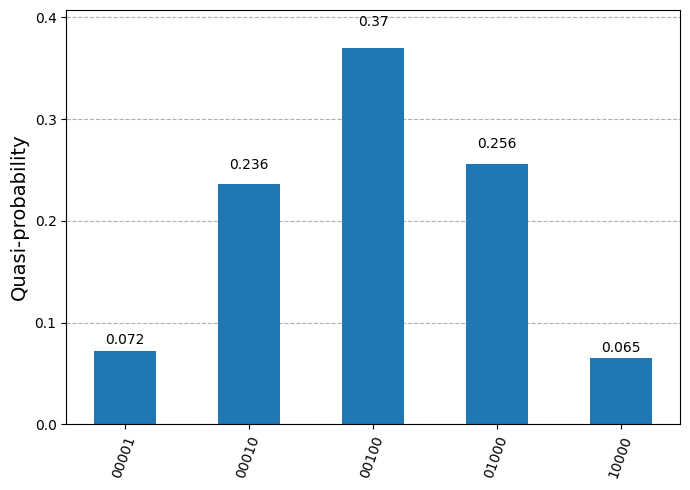

In [9]:
backend = AerSimulator()
# make the quantum circuit compatible with backend
pass_manager = generate_preset_pass_manager(backend = backend, optimization_level=3)
transpiled_circuit = pass_manager.run(quantum_circ)

sampler = Sampler(mode = backend)
counts = sampler.run([quantum_circ], shots = 1024).result()[0].data.c_reg.get_counts()
print(counts)
plot_distribution(counts)

In [10]:
# Tommorrow's taks : 
# Create cicuit for 9-level
# Make it somehow for n-levels ....

In [21]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def create_qgb_circuit(levels):
    assert levels >= 1, "Levels must be >= 1"

    total_qubits = 2 * levels + 2
    middle = levels + 1

    qreg = QuantumRegister(total_qubits, name="q")
    creg = ClassicalRegister(levels + 1, name="c")
    qc = QuantumCircuit(qreg, creg)

    # Initial superposition and ball placement
    qc.h(0)
    qc.x(middle)

    ball_positions = [middle]

    for step in range(levels):
        qc.reset(0)
        qc.h(0)

        new_positions = set()
        positions_this_step = sorted(ball_positions)

        for i, pos in enumerate(positions_this_step):
            left = pos - 1
            right = pos + 1

            if left >= 1 and right < total_qubits:
                qc.cswap(0, left, pos)
                qc.cx(pos, 0)
                qc.cswap(0, pos, right)

                # Only apply extra CX if this is NOT the last position of this step
                if step >= 1 and i < len(positions_this_step) - 1:
                    qc.cx(right, 0)

                new_positions.update([left, right])

        ball_positions = sorted(new_positions)

    # Measure only the odd-indexed qubits (like [1, 3, 5, 7, 9] for level 4)
    measure_qubits = [i for i in range(1, total_qubits, 2)]
    for i, q in enumerate(measure_qubits[:levels + 1]):
        qc.measure(q, creg[i])

    return qc


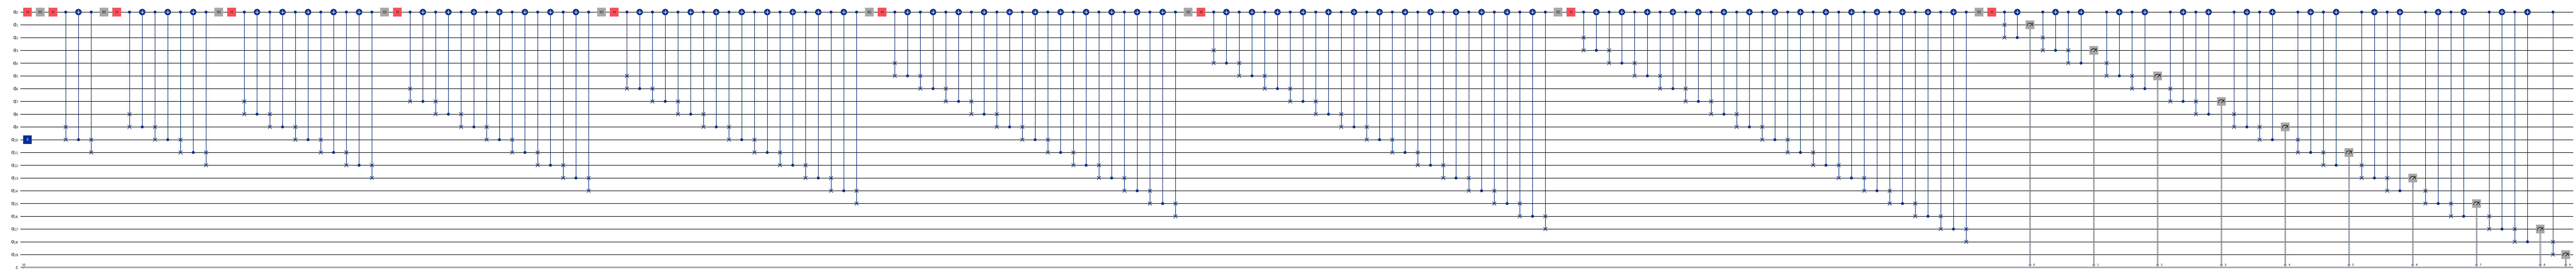

In [27]:
qc = create_qgb_circuit(9)
qc.draw('mpl', fold=-1)

### Running Below cell will take 18-20 minutes approximately.

{'0000100000': 259, '0000010000': 271, '0000001000': 173, '0001000000': 153, '0000000100': 78, '0000000001': 1, '0100000000': 17, '0000000010': 17, '0010000000': 55}


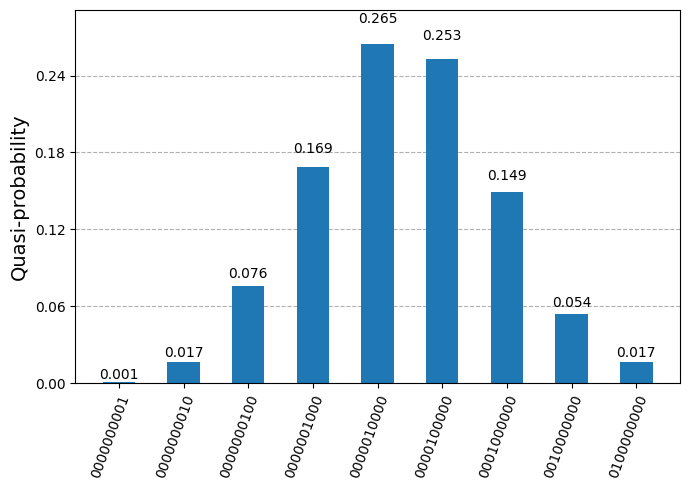

In [29]:
backend = AerSimulator()
# make the quantum circuit compatible with backend
pass_manager = generate_preset_pass_manager(backend = backend, optimization_level=3)
transpiled_circuit = pass_manager.run(qc)

sampler = Sampler(mode = backend)
counts = sampler.run([qc], shots = 1024).result()[0].data.c.get_counts()
print(counts)
plot_distribution(counts)